<a href="https://colab.research.google.com/github/amaziarczyk/Projects/blob/master/Kaggle/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projekt "Titanic"- model predykcji przeżycia katastrofy

PassengerId', -ID pasażera

'Survived',  - czy przeżył

'Pclass', - klasa

'Name', -imie

'Sex', płeć

'Age', - wiek

'SibSp',-Liczba rodzeństwa / małżonków na pokładzie Titanica

'Parch', - Liczba rodziców / dzieci na pokładzie Titanica

'Ticket', - numer biletu

'Fare', - taryfa

'Cabin', - numer kabiny

'Embarked - port wsiadania, C = Cherbourg, Q = Queenstown, S = Southampton





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn

In [109]:
train=pd.read_csv("/content/drive/MyDrive/Folder bez nazwy/train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [126]:
df=train.copy()

In [112]:
#sprawdzenie rozkładu kolumn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
# braki w kolumnach
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [114]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [49]:
px.pie(df, names='Sex', width= 350, height=350, title='Rozkład pasażerów według płci', color_discrete_sequence=['#a0bbde','#e37697'] )

In [50]:
# liczba osób które przeżyły (1) i nie przeżyły (0)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [39]:
px.bar(df, x='Pclass', y='Survived', width=600, height=300, color_discrete_sequence=['#eb98b1'])

In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Braki danych

In [129]:
# usunięcie zbędnych kolumn
df=df.drop(['Ticket','Cabin'], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [116]:
#srednia wieku
a=round(df['Age'].mean(),0)
a

30.0

In [131]:
# uzupełnienie brakujących danych średnim wiekiem
df['Age']=df['Age'].fillna(a)

In [132]:
#uzupełnienie braków wartości poprzednią
df['Embarked']=df['Embarked'].fillna(method='ffill')

In [133]:
#ponowne sprawdzenie czy są braki danych
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Kodowanie zmiennych kategorycznych

In [134]:
df=pd.get_dummies(df, drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Standaryzowanie zmiennych ilościowych

In [93]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler=StandardScaler()
df[['Fare','Age']]=scaler.fit_transform(df[['Fare','Age']])
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.597055,1,0,-0.502445,1,0,1
1,2,1,1,0.634162,1,0,0.786845,0,0,0
2,3,1,3,-0.289251,0,0,-0.488854,0,0,1
3,4,1,1,0.403309,1,0,0.420730,0,0,1
4,5,0,3,0.403309,0,0,-0.486337,1,0,1


In [136]:
#podział zbioru na treningowy i testowy
target=df['Survived']
data=df.drop('Survived', axis=1)

In [101]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test= train_test_split(data, target)

In [139]:
print('Zbiór treningowy:', X_train.shape[0])
print('Zbiór testowy:', X_test.shape[0])

Zbiór treningowy: 668
Zbiór testowy: 223


In [140]:
#wykorzystanie regresji logistycznej do rozwiązania problemu klasyfikacji
from sklearn.linear_model import LogisticRegression

In [142]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [151]:
# wartości prawdziwe i przewidziane przez model
df2=pd.DataFrame(data={
    'y_test':y_test,
    'y_pred':y_pred
})
df2.head(10)

,y_test,y_pred
104,0,0
266,0,0
715,0,0
112,0,0
95,0,0
98,1,1
878,0,0
675,0,0
251,0,0
391,1,0


In [156]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5dea5180f0>)

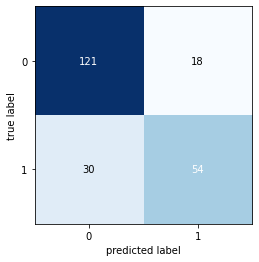

In [157]:
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [164]:
from sklearn.metrics import accuracy_score

In [166]:
print("Dopasowanie modelu wynosi:", round(accuracy_score(y_test, y_pred),1)*100,'%')

Dopasowanie modelu wynosi: 80.0 %
